## Problem 4: Visual story telling part 2, Capital Metro data

In [29]:
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
cm_data = pd.read_csv("data/capmetro_UT.csv")

cm_data["timestamp"] = pd.to_datetime(cm_data["timestamp"])
cm_data = cm_data.set_index("timestamp")

In [21]:
def time_of_day(r):
    if r['hour_of_day'] in (5,6,7,8,9,10):
        return 'morning'
    if r['hour_of_day'] in (11,12,13,14,15,16):
        return 'midday'
    if r['hour_of_day'] in (17,18,19,20,21,22):
        return 'night'
    if r['hour_of_day'] in (23,24,1,2,3,4):
        return 'midnight'
    
cm_data['time_of_day'] = cm_data.apply(time_of_day, axis =1)
cm_data['time_of_day'].value_counts()

midday     2184
morning    1820
night      1820
Name: time_of_day, dtype: int64

<Axes: xlabel='time_of_day'>

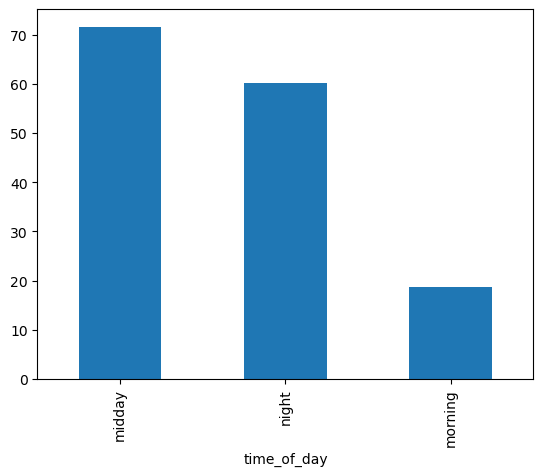

In [22]:
cm_data.groupby('time_of_day')['boarding'].mean().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='time_of_day'>

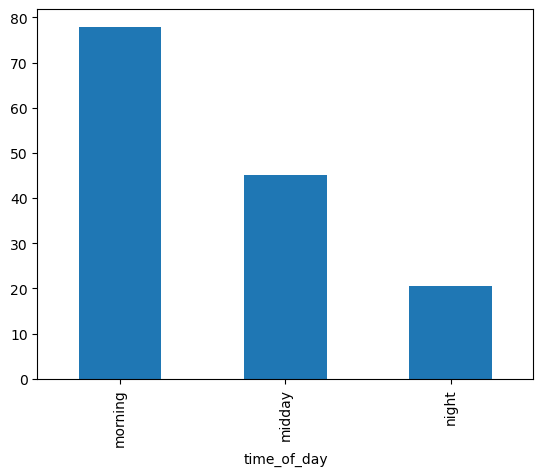

In [23]:
cm_data.groupby('time_of_day')['alighting'].mean().sort_values(ascending=False).plot(kind="bar")

The hours of 11 am-4 pm have the greatest average passengers boarding, meaning the greatest amount of people are leaving school then. The hours of 5am-10am have the highest average alighting passengers, meaning people are arriving at school during this time.

<Axes: xlabel='day_of_week'>

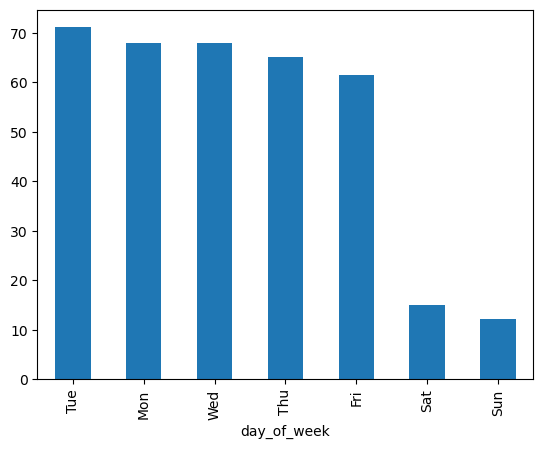

In [24]:
cm_data.groupby('day_of_week')['boarding'].mean().sort_values(ascending=False).plot(kind="bar")

Weekdays have by far a greater average amount of boarders than on weekends. This could tell us that more people are commuting for work and school rather than for entertainment. 

<Axes: xlabel='day_of_week,time_of_day'>

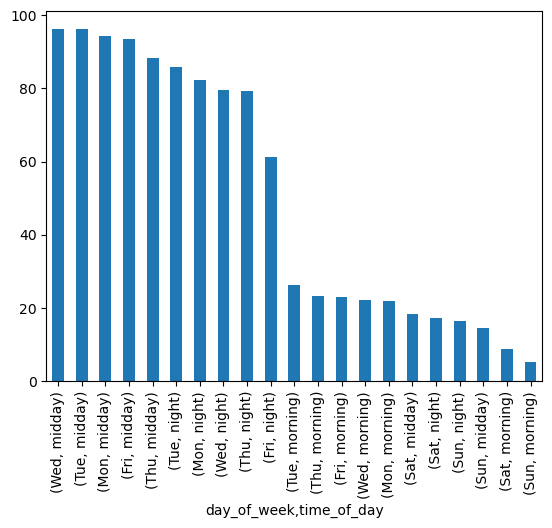

In [25]:
cm_data.groupby(['day_of_week', 'time_of_day'])['boarding'].mean().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='weekend,time_of_day'>

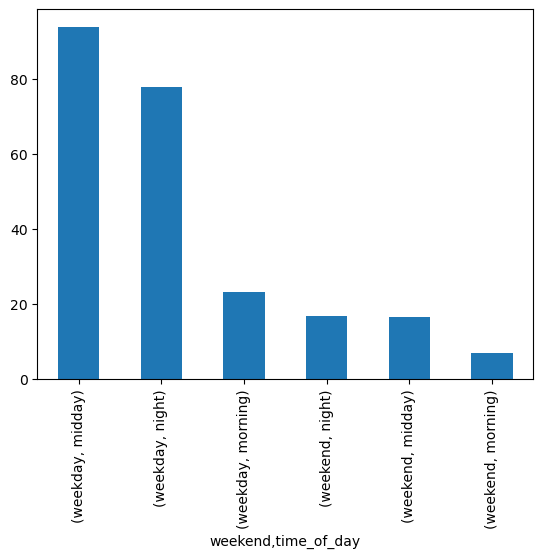

In [26]:
cm_data.groupby(['weekend', 'time_of_day'])['boarding'].mean().sort_values(ascending=False).plot(kind="bar")

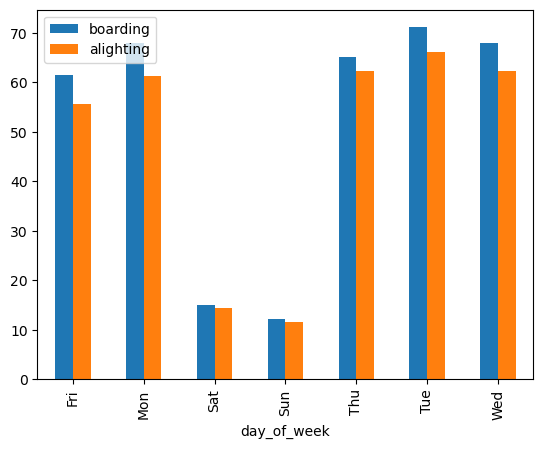

In [27]:

days_of_week = cm_data.groupby("day_of_week")[["boarding","alighting"]].mean().plot(kind="bar")

A surprising insight is that the boarding and alighting don´t match. What assumes that the cameras are on the campus stations and not inside the buses. If the camera was inside the bus then the number of people getting in and out should match. But if the camera is on the stations then don´t really need to match since a person can get in a campus station but then they can go off on a station outside the campus. In other words, we can define the boarding and alighting as people leaving the campus and arriving to campus respectively.

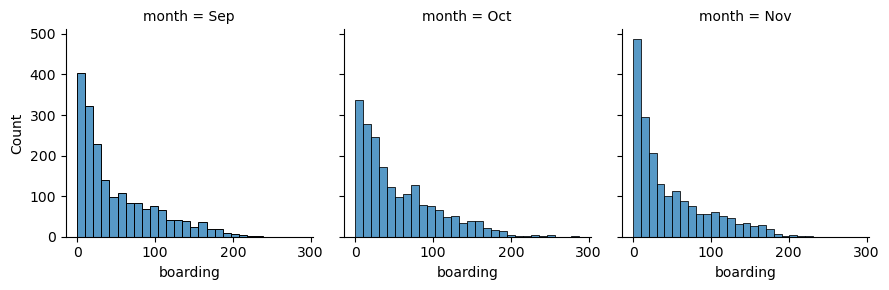

In [30]:
g = sns.FacetGrid(cm_data, col="month")
g.map_dataframe(sns.histplot, x="boarding")

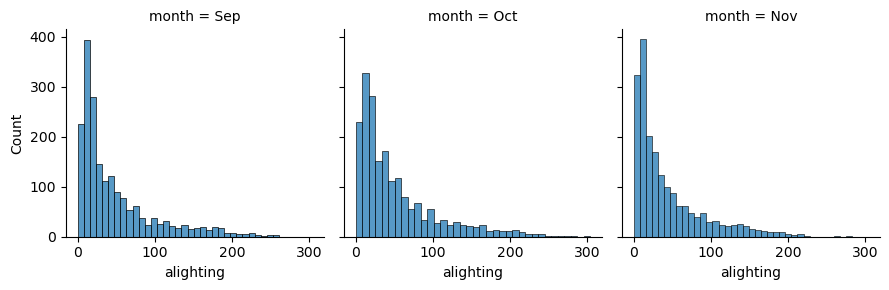

In [31]:
h = sns.FacetGrid(cm_data, col="month")
h.map_dataframe(sns.histplot, x="alighting")

From the three months, October is the one with lower flow in the bus. On contrast, November the month with the highest flow in the campus bus stations.

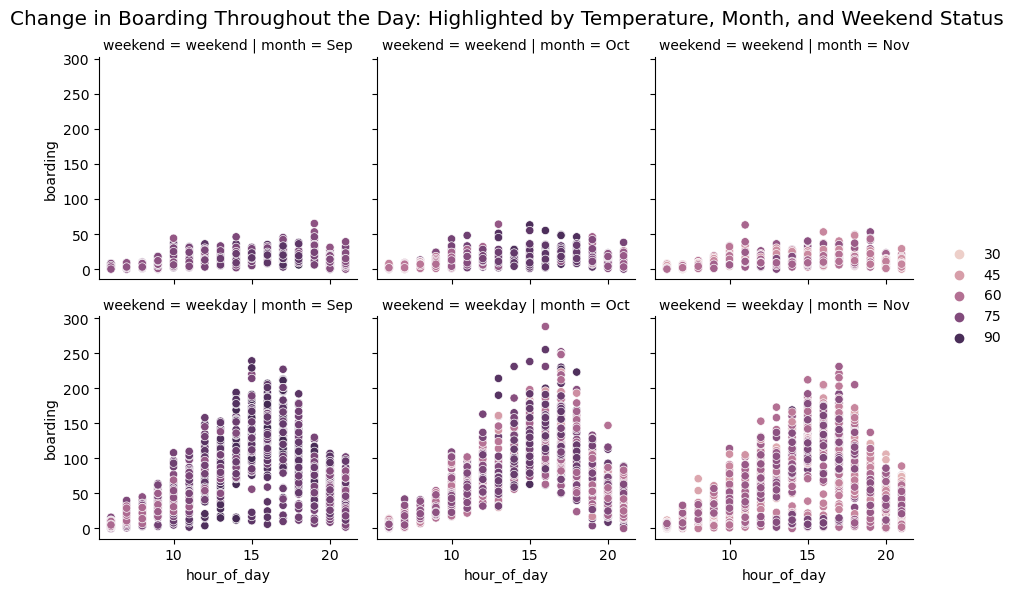

In [32]:
g = sns.FacetGrid(cm_data, col="month", row='weekend')
hueorder = cm_data['temperature'].sort_values()
g.map_dataframe(sns.scatterplot, x="hour_of_day", y="boarding", hue=hueorder, hue_order=True)
g.add_legend()
g.fig.suptitle("Change in Boarding Throughout the Day: Highlighted by Temperature, Month, and Weekend Status",fontsize = 'x-large')
g.fig.subplots_adjust( top = 0.9 )


In October, there is a higher numbers of boarding in weekdays compare with the other months where the number of boarding range have lower minimum around 10:00 am and 6:00 pm

In [15]:
cm_data.loc["2018-09-11"]

,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
timestamp,,,,,,,
2018-09-11 06:00:00,0,9,Tue,72.62,6,Sep,weekday
2018-09-11 06:15:00,8,18,Tue,72.62,6,Sep,weekday
2018-09-11 06:30:00,7,23,Tue,72.62,6,Sep,weekday
2018-09-11 06:45:00,3,17,Tue,72.62,6,Sep,weekday
2018-09-11 07:00:00,6,31,Tue,72.70,7,Sep,weekday
...,...,...,...,...,...,...,...
2018-09-11 20:45:00,45,4,Tue,75.79,20,Sep,weekday
2018-09-11 21:00:00,95,12,Tue,75.40,21,Sep,weekday
2018-09-11 21:15:00,41,8,Tue,75.40,21,Sep,weekday


Text(0.5, 0.98, 'Halloween Weekend Bus Ridership')

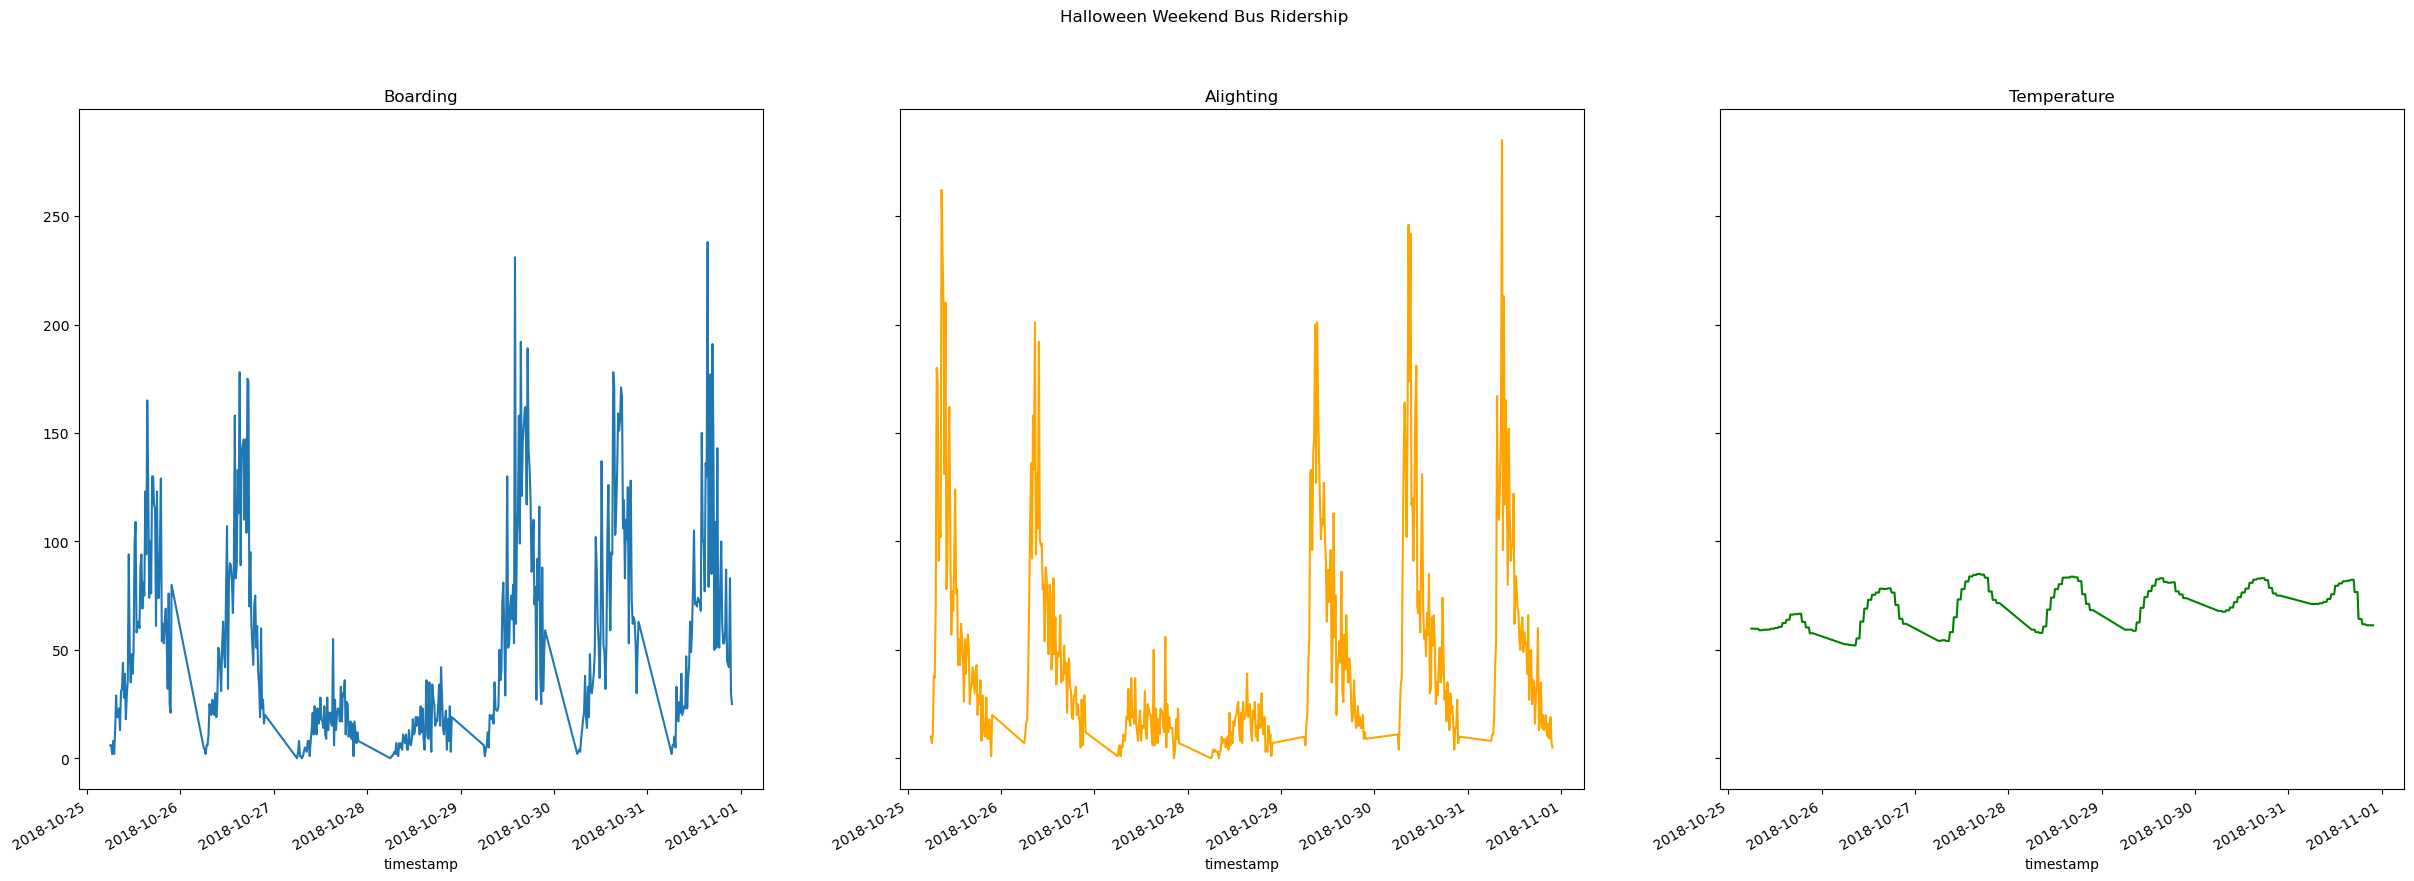

In [16]:
fig_1, (ax1, ax2, ax3) = subplots(nrows=1,
                           ncols=3,
                           sharey=True,
                           figsize=(30, 10))

cm_data["2018-10-25":"2018-10-31"]["boarding"].plot(ax=ax1, title="Boarding")
cm_data["2018-10-25":"2018-10-31"]["alighting"].plot(ax=ax2, title="Alighting", color="orange")
cm_data["2018-10-25":"2018-10-31"]["temperature"].plot(ax=ax3, title="Temperature", color="green")

fig_1.suptitle("Halloween Weekend Bus Ridership")

Text(0.5, 0.98, 'Average Month Bus Ridership')

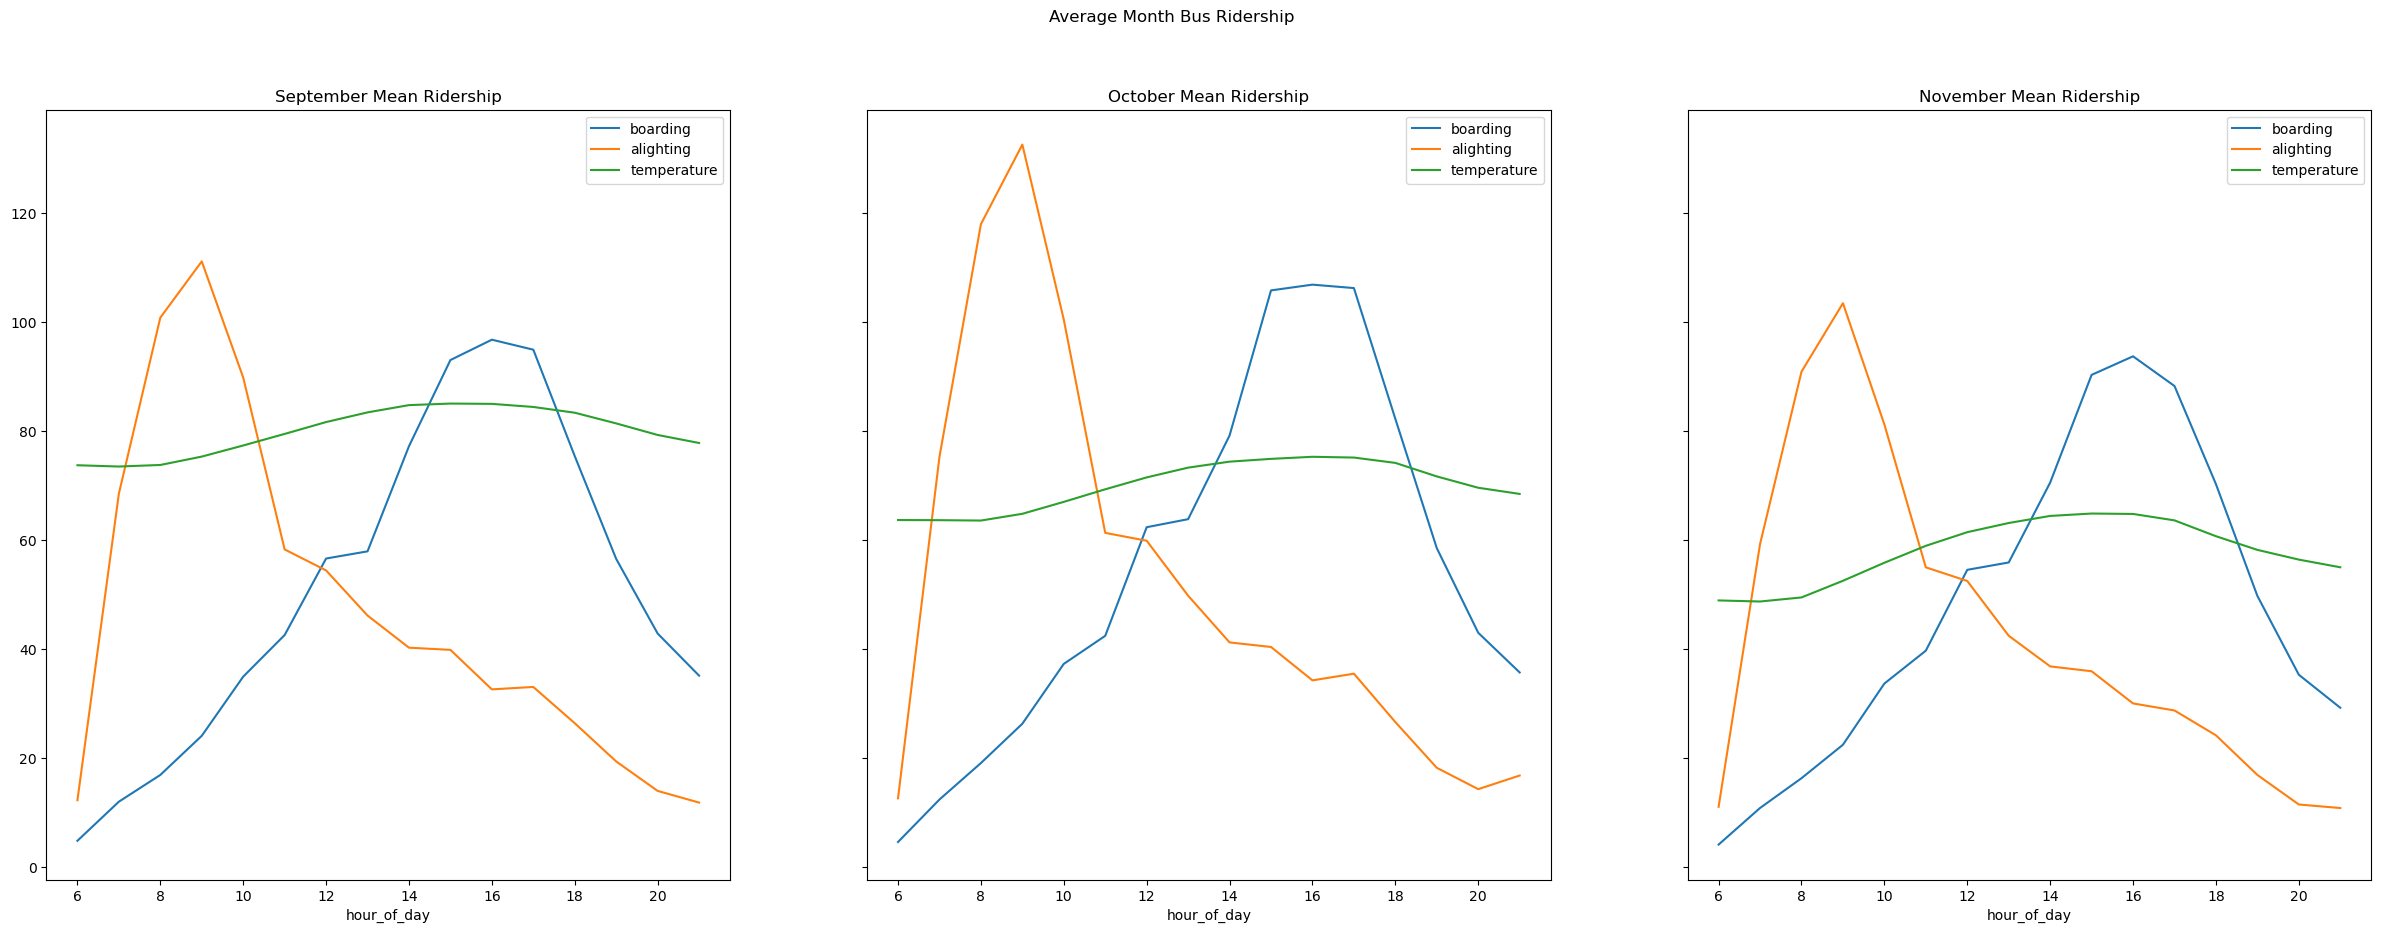

In [17]:
fig_1, (ax1, ax2, ax3) = subplots(nrows=1,
                           ncols=3,
                           sharey=True,
                           figsize=(30, 10))



september = cm_data[cm_data["month"] == "Sep"]
september.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="September Mean Ridership", ax=ax1)
october = cm_data[cm_data["month"] == "Oct"]
october.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="October Mean Ridership", ax=ax2)
november = cm_data[cm_data["month"] == "Nov"]
november.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="November Mean Ridership", ax=ax3)

fig_1.suptitle("Average Month Bus Ridership")

We can see that there is a pattern of people arriving at campus is the morning with a peak on 8 am. On the same track, there is a peak of people leaving campus around 6pm and 8pm. This pattern is consistent across months.

Text(0.5, 0.98, 'Halloween Weekend Bus Ridership')

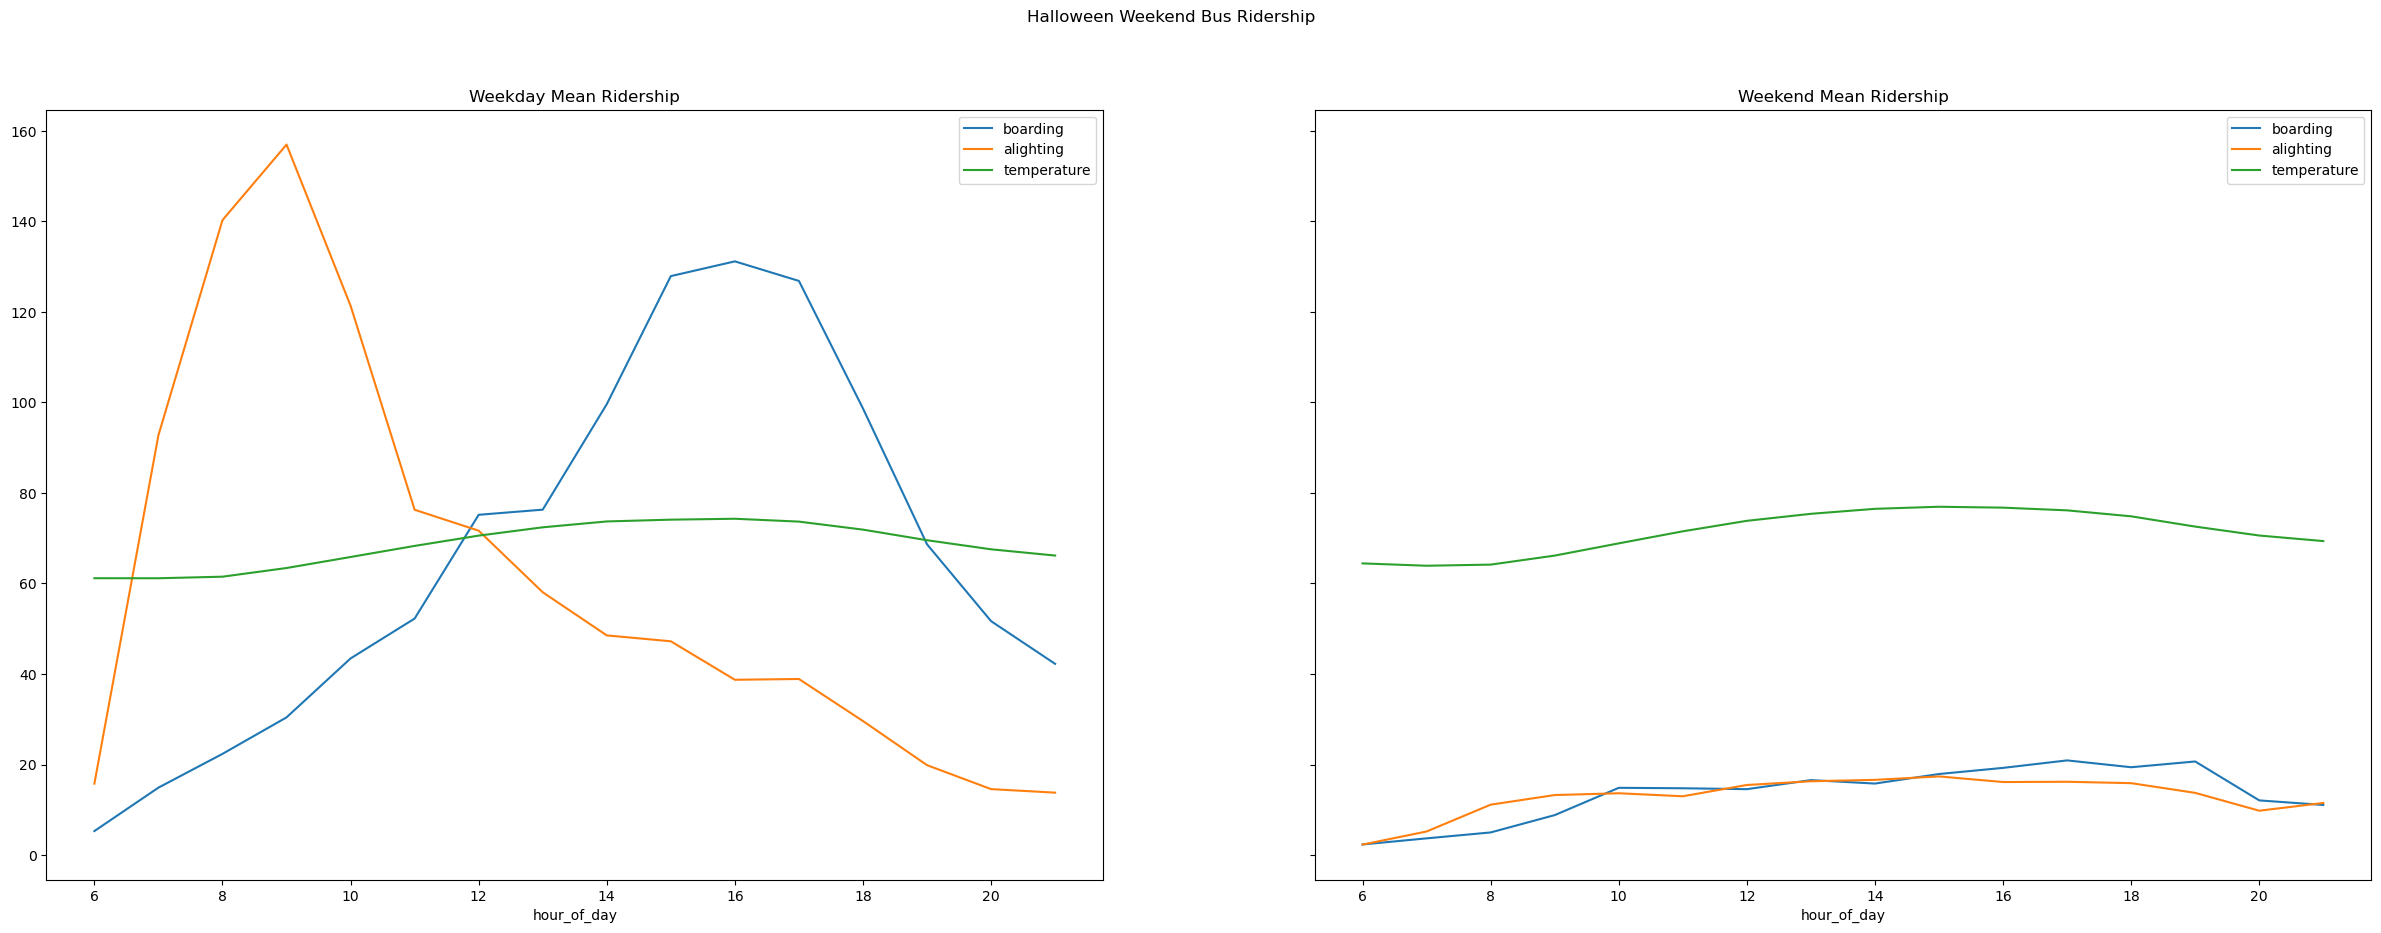

In [18]:
fig_1, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           figsize=(30, 10))



weekday = cm_data[cm_data["weekend"] == "weekday"]
weekday.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="Weekday Mean Ridership", ax=ax1)
weekend = cm_data[cm_data["weekend"] == "weekend"]
weekend.groupby("hour_of_day")[["boarding","alighting","temperature"]].mean().plot(title="Weekend Mean Ridership", ax=ax2)

fig_1.suptitle("Halloween Weekend Bus Ridership")

There is a noteworthy difference between the bus flow in weekdays compare with weekend, with a huge drop on weekends in both arriving and leaving.